### General imports

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

### Load and display the dataset

In [5]:
# indicate your path to the data (not in the repo because of size)
path = "C:\\Users\\33695\\Desktop\\train.csv"
df = pd.read_csv(path, sep = ',')

In [6]:
df.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


In [7]:
# drop the row_id column (unnecessary)
df = df.drop(columns = ['row_id'])

### Analysing the features' dataset

In [8]:
print('Number of days : ',len(df['date_id'].unique()))
print('Number of stocks : ',len(df['stock_id'].unique()))

Number of days :  481
Number of stocks :  200


* Count the missing values

In [9]:
print('Number of missing values : ',df.isna().sum().sum())

print('Number of missing values per column : ')  
print(df.isna().sum())

Number of missing values :  5752930
Number of missing values per column : 
stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 220
imbalance_buy_sell_flag          0
reference_price                220
matched_size                   220
far_price                  2894342
near_price                 2857180
bid_price                      220
bid_size                         0
ask_price                      220
ask_size                         0
wap                            220
target                          88
time_id                          0
dtype: int64


* Fill far_price & near_price 

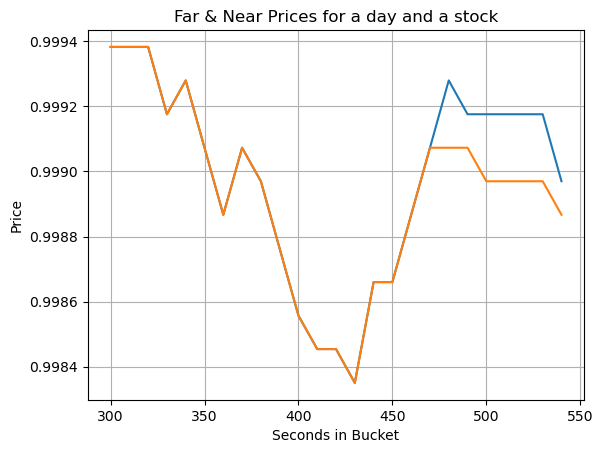

In [10]:
# plot near_price and far_price for a random day
df_stock_0 = df[(df['stock_id'] == 0) & (df['date_id'] == 15)]

plt.plot(df_stock_0['seconds_in_bucket'], df_stock_0['far_price'], label=f'Far Price on a day')
plt.plot(df_stock_0['seconds_in_bucket'], df_stock_0['near_price'], label=f'Near Price on a day') 

plt.xlabel('Seconds in Bucket')
plt.ylabel('Price')
plt.title('Far & Near Prices for a day and a stock')
plt.grid(True)
plt.show()

* Each day, near_price and far_price values begin after 300 seconds, to complete the dataset the default value is 1.

In [11]:
# fill the missing values with 1.0 for near_price and far_price. (first approach)
df['near_price'] = df['near_price'].fillna(1.0)
df['far_price'] = df['far_price'].fillna(1.0)

* Analyzing the values

In [12]:
# print min and max values for far_price and near_price
print('Min value for far_price : ',df['far_price'].min())
print('Max value for far_price : ',df['far_price'].max())
print('Min value for near_price : ',df['near_price'].min())
print('Max value for near_price : ',df['near_price'].max())

Min value for far_price :  7.7e-05
Max value for far_price :  437.9531
Min value for near_price :  0.786988
Max value for near_price :  1.309732


In [13]:
# find the day where the far_price is the highest
df[df['far_price'] > 2].size / df.size

1.870950251814631e-05

* Some outliers values have a anormally hight value in far_price.

In [14]:
# put 2 in the far_price column for the day where the far_price is the highest
df.loc[df['far_price'] > 2, 'far_price'] = 2

* Treat the other mising values

In [15]:
# print the day and the stocks where there are missing values for whole dataset
df[df.isna().any(axis=1)].groupby(['date_id','stock_id']).size()


date_id  stock_id
35       131         55
328      101         55
388      158         55
438      19          55
dtype: int64

* The first approach is to remove these columns

In [16]:
# get the days where there are missing values
days = df[df.isna().any(axis=1)]['date_id'].unique()

# remove the days where there are missing values
df = df[~df['date_id'].isin(days)]

In [17]:
print('Number of missing values : ',df.isna().sum().sum())

Number of missing values :  0


* There is no more missing values in the dataset

### Analyzing the target value

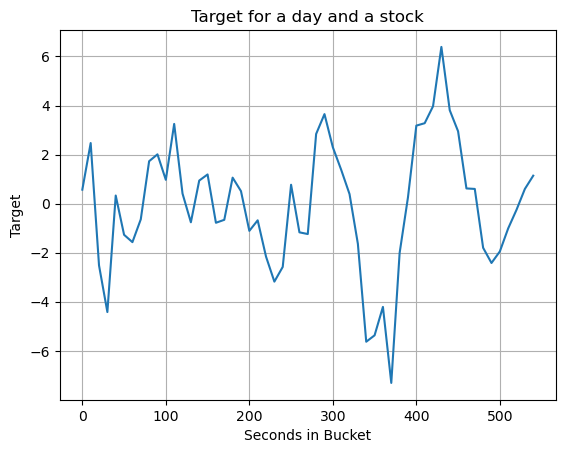

In [18]:
# plot the target variable for a random day and a random stock
df_stock_0 = df[(df['stock_id'] == 0) & (df['date_id'] == 15)]

plt.plot(df_stock_0['seconds_in_bucket'], df_stock_0['target'], label=f'Target on a day')
plt.xlabel('Seconds in Bucket')
plt.ylabel('Target')
plt.title('Target for a day and a stock')
plt.grid(True)
plt.show()

Min value for target :  -385.2898
Max value for target :  446.07043


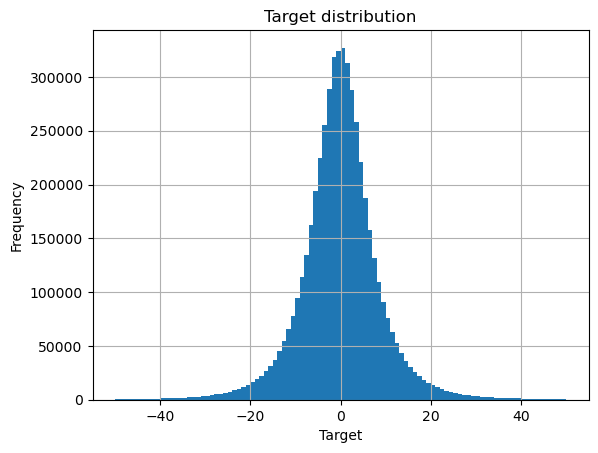

In [19]:
# analysing the min & max values of the target variable
print('Min value for target : ',df['target'].min())
print('Max value for target : ',df['target'].max())

# analyzing the distribution of the target variable
plt.hist(df['target'], bins=100, range=(-50,50))
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Target distribution')
plt.grid(True)

A faire :
* Etat de l'art des modèles RNN pour des time series (LSTM,ARIMA etc...)
* definition de l'entrée : vecteur shape [200,17]
* definition de la sortie : vecteur shape [200,1] -> target a chaque instant
* a demander, nombre de paramètre avec la capacité GPU
* enlever des colonnes ?
* preparer la donnée

## Add precedent values

In [20]:
column_names = ["imbalance_buy_sell_flag","reference_price","wap","matched_size","far_price","near_price"]
window=[1,2,3]

def add_historic_features(df, column_names=column_names, window=window):
    df_copy = df.copy()
    for col in column_names:
        grouped_vals = df_copy.groupby(["stock_id","date_id"])[col]
        for shift in window:
            df_copy[col+"_shift"+str(shift)] = grouped_vals.shift(shift)
    return df_copy

In [21]:
df2 = add_historic_features(df)
df2[df2['stock_id'] == 0].head(10)

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,...,wap_shift3,matched_size_shift1,matched_size_shift2,matched_size_shift3,far_price_shift1,far_price_shift2,far_price_shift3,near_price_shift1,near_price_shift2,near_price_shift3
0,0,0,0,3180602.69,1,0.999812,13380276.64,1.0,1.0,0.999812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,0,0,10,1299772.70,1,1.000026,15261106.63,1.0,1.0,0.999812,...,NaN,13380276.64,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
382,0,0,20,1299772.70,1,0.999919,15261106.63,1.0,1.0,0.999812,...,NaN,15261106.63,13380276.64,NaN,1.0,1.0,NaN,1.0,1.0,NaN
573,0,0,30,1299772.70,1,1.000133,15261106.63,1.0,1.0,1.000026,...,1.000000,15261106.63,15261106.63,13380276.64,1.0,1.0,1.0,1.0,1.0,1.0
764,0,0,40,1218204.43,1,1.000455,15342674.90,1.0,1.0,1.000241,...,0.999892,15261106.63,15261106.63,15261106.63,1.0,1.0,1.0,1.0,1.0,1.0
955,0,0,50,1218204.43,1,1.000455,15342674.90,1.0,1.0,1.000348,...,0.999842,15342674.90,15261106.63,15261106.63,1.0,1.0,1.0,1.0,1.0,1.0
1146,0,0,60,1218204.43,1,1.000562,15342674.90,1.0,1.0,1.000455,...,1.000085,15342674.90,15342674.90,15261106.63,1.0,1.0,1.0,1.0,1.0,1.0
1337,0,0,70,1264494.89,1,1.000455,15352380.96,1.0,1.0,1.000348,...,1.000317,15342674.90,15342674.90,15342674.90,1.0,1.0,1.0,1.0,1.0,1.0
1528,0,0,80,1189832.86,1,1.000241,15427043.00,1.0,1.0,1.000133,...,1.000434,15352380.96,15342674.90,15342674.90,1.0,1.0,1.0,1.0,1.0,1.0
1719,0,0,90,1189272.89,1,1.000562,15427602.97,1.0,1.0,1.000348,...,1.000517,15427043.00,15352380.96,15342674.90,1.0,1.0,1.0,1.0,1.0,1.0


In [22]:
# remove the lines where there are missing values
df2 = df2.dropna()

In [23]:
df2[df2['stock_id'] == 0].head(10)

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,...,wap_shift3,matched_size_shift1,matched_size_shift2,matched_size_shift3,far_price_shift1,far_price_shift2,far_price_shift3,near_price_shift1,near_price_shift2,near_price_shift3
573,0,0,30,1299772.70,1,1.000133,15261106.63,1.0,1.0,1.000026,...,1.000000,15261106.63,15261106.63,13380276.64,1.0,1.0,1.0,1.0,1.0,1.0
764,0,0,40,1218204.43,1,1.000455,15342674.90,1.0,1.0,1.000241,...,0.999892,15261106.63,15261106.63,15261106.63,1.0,1.0,1.0,1.0,1.0,1.0
955,0,0,50,1218204.43,1,1.000455,15342674.90,1.0,1.0,1.000348,...,0.999842,15342674.90,15261106.63,15261106.63,1.0,1.0,1.0,1.0,1.0,1.0
1146,0,0,60,1218204.43,1,1.000562,15342674.90,1.0,1.0,1.000455,...,1.000085,15342674.90,15342674.90,15261106.63,1.0,1.0,1.0,1.0,1.0,1.0
1337,0,0,70,1264494.89,1,1.000455,15352380.96,1.0,1.0,1.000348,...,1.000317,15342674.90,15342674.90,15342674.90,1.0,1.0,1.0,1.0,1.0,1.0
1528,0,0,80,1189832.86,1,1.000241,15427043.00,1.0,1.0,1.000133,...,1.000434,15352380.96,15342674.90,15342674.90,1.0,1.0,1.0,1.0,1.0,1.0
1719,0,0,90,1189272.89,1,1.000562,15427602.97,1.0,1.0,1.000348,...,1.000517,15427043.00,15352380.96,15342674.90,1.0,1.0,1.0,1.0,1.0,1.0
1910,0,0,100,1249282.50,1,1.000348,15427602.97,1.0,1.0,1.000241,...,1.000421,15427602.97,15427043.00,15352380.96,1.0,1.0,1.0,1.0,1.0,1.0
2101,0,0,110,1277280.77,1,1.000133,15399604.70,1.0,1.0,1.000026,...,1.000148,15427602.97,15427602.97,15427043.00,1.0,1.0,1.0,1.0,1.0,1.0
2292,0,0,120,1216057.90,1,1.000133,15460827.57,1.0,1.0,0.999812,...,1.000426,15399604.70,15427602.97,15427602.97,1.0,1.0,1.0,1.0,1.0,1.0


### Normalizing columns

In [24]:
# Normalize the data except for the target variable, the stock_id and the date_id and the seconds_in_bucket 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

not_to_normalize = ["target","stock_id","date_id","seconds_in_bucket"]

column_names = [col for col in df2.columns if col not in not_to_normalize]

df2[column_names] = scaler.fit_transform(df2[column_names])

In [25]:
df2.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,...,wap_shift3,matched_size_shift1,matched_size_shift2,matched_size_shift3,far_price_shift1,far_price_shift2,far_price_shift3,near_price_shift1,near_price_shift2,near_price_shift3
573,0,0,30,0.000436,1.0,0.456024,0.001978,0.499981,0.407488,0.456685,...,0.459905,0.001978,0.001978,0.001734,0.499981,0.499981,0.499981,0.407488,0.407488,0.407488
574,1,0,30,0.000056,0.0,0.454358,0.000212,0.499981,0.407488,0.455774,...,0.459905,0.000212,0.000212,0.000212,0.499981,0.499981,0.499981,0.407488,0.407488,0.407488
575,2,0,30,0.000057,0.0,0.450525,0.000253,0.499981,0.407488,0.450843,...,0.459905,0.000253,0.000251,0.000235,0.499981,0.499981,0.499981,0.407488,0.407488,0.407488
576,3,0,30,0.003647,0.0,0.453872,0.002519,0.499981,0.407488,0.454988,...,0.459905,0.002519,0.002519,0.002383,0.499981,0.499981,0.499981,0.407488,0.407488,0.407488
577,4,0,30,0.000139,0.0,0.454231,0.002319,0.499981,0.407488,0.455647,...,0.459905,0.002319,0.002319,0.002315,0.499981,0.499981,0.499981,0.407488,0.407488,0.407488


# First approach : predict for target line by line

In [67]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import xgboost as xgb 

### Create the models

In [86]:
import warnings
warnings.filterwarnings("ignore")

In [70]:
x_cols = [col for col in df2.columns if col not in ['row_id', 'time_id', 'date_id', 'target']]
y_cols = ["target"]

X = df2[x_cols]
y = df2[y_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [72]:
# model de prédiction naïf : predict last target
y_pred = y_test.shift(1)
y_pred = y_pred.dropna()

print('MAE for Naive Prediction : ',mean_absolute_error(y_test[1:], y_pred))

MAE for Naive Prediction :  9.518815530395404


In [83]:
# model de prédiction naïf : predict the average of the last 10 targets
y_pred = y_test.rolling(10, min_periods=1).mean()
y_pred = y_pred.shift(10)  # Shift the predictions by 1 to align with y_test
y_pred = y_pred.dropna()

print('MAE for Naive Prediction : ',mean_absolute_error(y_test[10:], y_pred))

MAE for Naive Prediction :  6.8804439713167955


In [101]:
# Linear Regression

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

print('MAE for Linear Regression : ',mean_absolute_error(y_test, y_pred))

ValueError: Found array with dim 3. LinearRegression expected <= 2.

In [84]:
# XGBoost

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print('MAE for XGBoost : ',mean_absolute_error(y_test, y_pred))

MAE for XGBoost :  6.24857100254963


In [100]:
from keras.models import Sequential
from keras.layers import Input, Dense, LSTM, Dropout


DROPOUT = 0.5
LEARNING_RATE = 0.001
N_LAGS = 31
N_STOCKS = 1

def build_model(dropout=DROPOUT):
    model = Sequential()
    model.add(Input(shape=(N_LAGS, N_STOCKS)))
    model.add(Dropout(dropout))
    model.add(LSTM(25, return_sequences=False))
    model.add(Dropout(dropout))
    model.add(Dense(N_STOCKS))
    model.compile(loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE))
    return model

model = build_model()
history = model.fit(X_train, y_train, epochs=1000, batch_size=512, verbose=1)

X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

y_pred = model.predict(X_test)

print('MAE for LSTM: ', mean_absolute_error(y_test, y_pred))


Epoch 1/1000
7674/7674 [==============================] - 98s 13ms/step - loss: 6.3728
Epoch 2/1000
7674/7674 [==============================] - 98s 13ms/step - loss: 6.3727
Epoch 3/1000
7674/7674 [==============================] - 99s 13ms/step - loss: 6.3727
Epoch 4/1000
7674/7674 [==============================] - 102s 13ms/step - loss: 6.3727
Epoch 5/1000
3134/7674 [===========>..................] - ETA: 1:02 - loss: 6.3744

KeyboardInterrupt: 